In [1]:
# Define paths to model files
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [2]:
# TensorFlow is an open source machine learning library
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

### 1. Generate Data

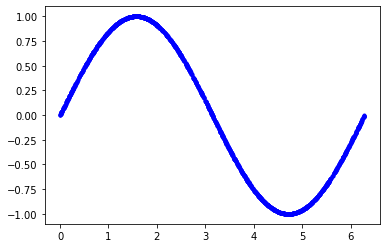

In [4]:
# Number of sample datapoints
SAMPLES = 2000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

### 2. Add Noise

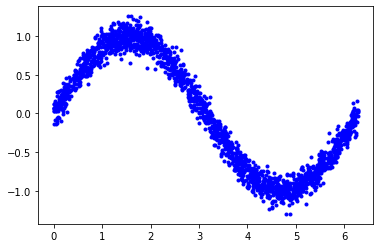

In [6]:
# Add a small random number to each y value
y_values += 0.01 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

### 3. Split the Data

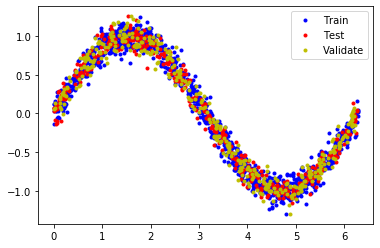

In [7]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

### 4. Design the Model

In [19]:
# We'll use Keras to create a simple model architecture
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 8 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [22]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [29]:
print("x train's shape = ", x_train.shape)

print("y train's shape = ", y_train.shape)

x train's shape =  (1200,)
y train's shape =  (1200,)


### 5. Train the Model

In [21]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64,
                        validation_data=(x_validate, y_validate))

Epoch 1/500
19/19 [==============================] - 0s 6ms/step - loss: 0.5722 - mae: 0.6840 - val_loss: 0.4765 - val_mae: 0.6117
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4850 - mae: 0.6199 - val_loss: 0.4372 - val_mae: 0.5765
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4640 - mae: 0.5990 - val_loss: 0.4115 - val_mae: 0.5543
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4208 - mae: 0.5637 - val_loss: 0.3902 - val_mae: 0.5389
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4182 - mae: 0.5658 - val_loss: 0.3714 - val_mae: 0.5264
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3890 - mae: 0.5428 - val_loss: 0.3557 - val_mae: 0.5147
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3574 - mae: 0.5158 - val_loss: 0.3400 - val_mae: 0.5046
Epoch 8/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3412 - m

19/19 [==============================] - 0s 2ms/step - loss: 0.1538 - mae: 0.3240 - val_loss: 0.1708 - val_mae: 0.3362
Epoch 64/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1596 - mae: 0.3300 - val_loss: 0.1720 - val_mae: 0.3366
Epoch 65/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1533 - mae: 0.3197 - val_loss: 0.1715 - val_mae: 0.3363
Epoch 66/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1644 - mae: 0.3393 - val_loss: 0.1708 - val_mae: 0.3359
Epoch 67/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1560 - mae: 0.3280 - val_loss: 0.1703 - val_mae: 0.3356
Epoch 68/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1518 - mae: 0.3258 - val_loss: 0.1724 - val_mae: 0.3362
Epoch 69/500
19/19 [==============================] - 0s 10ms/step - loss: 0.1537 - mae: 0.3276 - val_loss: 0.1692 - val_mae: 0.3352
Epoch 70/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1503 - mae: 

Epoch 125/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1450 - mae: 0.3163 - val_loss: 0.1686 - val_mae: 0.3306
Epoch 126/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1500 - mae: 0.3180 - val_loss: 0.1696 - val_mae: 0.3311
Epoch 127/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3244 - val_loss: 0.1688 - val_mae: 0.3307
Epoch 128/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1491 - mae: 0.3153 - val_loss: 0.1678 - val_mae: 0.3301
Epoch 129/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1470 - mae: 0.3166 - val_loss: 0.1702 - val_mae: 0.3312
Epoch 130/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1581 - mae: 0.3293 - val_loss: 0.1682 - val_mae: 0.3301
Epoch 131/500
19/19 [==============================] - 0s 9ms/step - loss: 0.1609 - mae: 0.3330 - val_loss: 0.1691 - val_mae: 0.3305
Epoch 132/500
19/19 [==============================] - 0s 2ms/step - 

19/19 [==============================] - 0s 2ms/step - loss: 0.1513 - mae: 0.3185 - val_loss: 0.1657 - val_mae: 0.3252
Epoch 187/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1462 - mae: 0.3161 - val_loss: 0.1663 - val_mae: 0.3255
Epoch 188/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1540 - mae: 0.3176 - val_loss: 0.1685 - val_mae: 0.3265
Epoch 189/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1416 - mae: 0.3064 - val_loss: 0.1656 - val_mae: 0.3250
Epoch 190/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1411 - mae: 0.3055 - val_loss: 0.1680 - val_mae: 0.3260
Epoch 191/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1445 - mae: 0.3116 - val_loss: 0.1651 - val_mae: 0.3247
Epoch 192/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1410 - mae: 0.3078 - val_loss: 0.1676 - val_mae: 0.3259
Epoch 193/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1519 -

19/19 [==============================] - 0s 2ms/step - loss: 0.1420 - mae: 0.3081 - val_loss: 0.1682 - val_mae: 0.3232
Epoch 248/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1392 - mae: 0.3008 - val_loss: 0.1652 - val_mae: 0.3217
Epoch 249/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1526 - mae: 0.3153 - val_loss: 0.1661 - val_mae: 0.3223
Epoch 250/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1394 - mae: 0.3002 - val_loss: 0.1640 - val_mae: 0.3211
Epoch 251/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1479 - mae: 0.3112 - val_loss: 0.1649 - val_mae: 0.3214
Epoch 252/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1445 - mae: 0.3069 - val_loss: 0.1639 - val_mae: 0.3210
Epoch 253/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1415 - mae: 0.3038 - val_loss: 0.1653 - val_mae: 0.3215
Epoch 254/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1436 -

Epoch 309/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1418 - mae: 0.3036 - val_loss: 0.1638 - val_mae: 0.3184
Epoch 310/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1456 - mae: 0.3056 - val_loss: 0.1641 - val_mae: 0.3187
Epoch 311/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1469 - mae: 0.3040 - val_loss: 0.1648 - val_mae: 0.3190
Epoch 312/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1450 - mae: 0.3047 - val_loss: 0.1628 - val_mae: 0.3178
Epoch 313/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1476 - mae: 0.3099 - val_loss: 0.1638 - val_mae: 0.3185
Epoch 314/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1478 - mae: 0.3082 - val_loss: 0.1631 - val_mae: 0.3179
Epoch 315/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1560 - mae: 0.3186 - val_loss: 0.1641 - val_mae: 0.3186
Epoch 316/500
19/19 [==============================] - 0s 2ms/step - 

19/19 [==============================] - 0s 2ms/step - loss: 0.1480 - mae: 0.3030 - val_loss: 0.1642 - val_mae: 0.3169
Epoch 371/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1431 - mae: 0.3015 - val_loss: 0.1616 - val_mae: 0.3155
Epoch 372/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1422 - mae: 0.3005 - val_loss: 0.1647 - val_mae: 0.3170
Epoch 373/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1411 - mae: 0.3013 - val_loss: 0.1625 - val_mae: 0.3159
Epoch 374/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1327 - mae: 0.2936 - val_loss: 0.1619 - val_mae: 0.3154
Epoch 375/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1409 - mae: 0.3006 - val_loss: 0.1627 - val_mae: 0.3160
Epoch 376/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1403 - mae: 0.2976 - val_loss: 0.1612 - val_mae: 0.3154
Epoch 377/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1401 -

Epoch 432/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.3126 - val_loss: 0.1660 - val_mae: 0.3162
Epoch 433/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1439 - mae: 0.2989 - val_loss: 0.1631 - val_mae: 0.3147
Epoch 434/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1385 - mae: 0.2989 - val_loss: 0.1609 - val_mae: 0.3136
Epoch 435/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1407 - mae: 0.2995 - val_loss: 0.1628 - val_mae: 0.3144
Epoch 436/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1367 - mae: 0.2935 - val_loss: 0.1613 - val_mae: 0.3137
Epoch 437/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1504 - mae: 0.3034 - val_loss: 0.1642 - val_mae: 0.3153
Epoch 438/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1479 - mae: 0.3023 - val_loss: 0.1617 - val_mae: 0.3139
Epoch 439/500
19/19 [==============================] - 0s 2ms/step - 

19/19 [==============================] - 0s 2ms/step - loss: 0.1444 - mae: 0.2991 - val_loss: 0.1645 - val_mae: 0.3140
Epoch 494/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1318 - mae: 0.2887 - val_loss: 0.1627 - val_mae: 0.3132
Epoch 495/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1331 - mae: 0.2907 - val_loss: 0.1613 - val_mae: 0.3125
Epoch 496/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1404 - mae: 0.2994 - val_loss: 0.1618 - val_mae: 0.3128
Epoch 497/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1401 - mae: 0.2967 - val_loss: 0.1644 - val_mae: 0.3140
Epoch 498/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1399 - mae: 0.2938 - val_loss: 0.1634 - val_mae: 0.3136
Epoch 499/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1411 - mae: 0.2947 - val_loss: 0.1613 - val_mae: 0.3126
Epoch 500/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1397 -

### 6. Plot Metrics

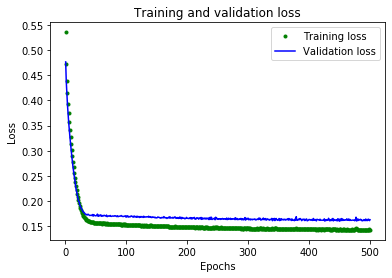

In [30]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

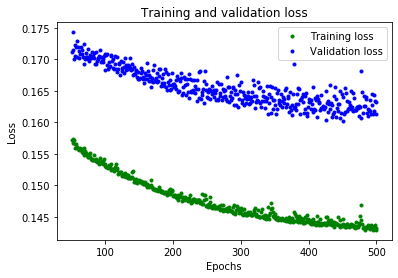

In [31]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 50

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

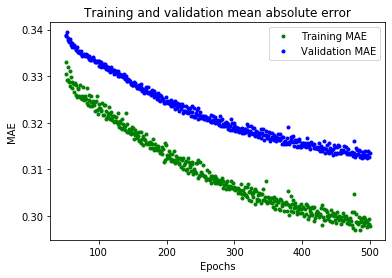

In [32]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

13/13 [==============================] - 0s 440us/step - loss: 0.1430 - mae: 0.2928


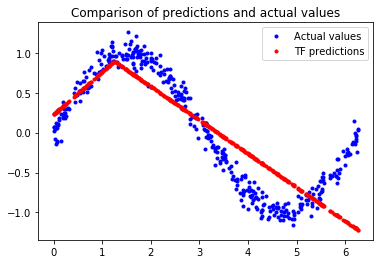

In [33]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model_1.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model_1.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()

## Training a Larger Model

In [35]:
## Now we change the shape of dense layer 1, on above, we use 8 neurons,
## here we use 16 neurons, by this we add more parameters in the 
## network, but finally you will find that it is useless :(
## To get preciser result, we must change network structure!


model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations
#model.add(keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model.compile(optimizer='adam', loss="mse", metrics=["mae"])

In [36]:
# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=64,
                    validation_data=(x_validate, y_validate))

# Save the model to disk
model.save(MODEL_TF)

Epoch 1/500
19/19 [==============================] - 0s 5ms/step - loss: 1.0346 - mae: 0.9069 - val_loss: 0.7204 - val_mae: 0.7128
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6283 - mae: 0.6492 - val_loss: 0.4785 - val_mae: 0.5649
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4623 - mae: 0.5515 - val_loss: 0.4037 - val_mae: 0.5332
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4020 - mae: 0.5387 - val_loss: 0.3802 - val_mae: 0.5268
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4057 - mae: 0.5521 - val_loss: 0.3678 - val_mae: 0.5211
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3848 - mae: 0.5370 - val_loss: 0.3595 - val_mae: 0.5157
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3627 - mae: 0.5176 - val_loss: 0.3505 - val_mae: 0.5104
Epoch 8/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3536 - m

19/19 [==============================] - 0s 2ms/step - loss: 0.1570 - mae: 0.3313 - val_loss: 0.1718 - val_mae: 0.3413
Epoch 64/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1618 - mae: 0.3357 - val_loss: 0.1732 - val_mae: 0.3413
Epoch 65/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.3241 - val_loss: 0.1724 - val_mae: 0.3405
Epoch 66/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1666 - mae: 0.3451 - val_loss: 0.1712 - val_mae: 0.3396
Epoch 67/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1581 - mae: 0.3336 - val_loss: 0.1709 - val_mae: 0.3390
Epoch 68/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1531 - mae: 0.3292 - val_loss: 0.1722 - val_mae: 0.3389
Epoch 69/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.3309 - val_loss: 0.1694 - val_mae: 0.3380
Epoch 70/500
19/19 [==============================] - ETA: 0s - loss: 0.1528 - mae: 0.341

19/19 [==============================] - 0s 2ms/step - loss: 0.1534 - mae: 0.3177 - val_loss: 0.1648 - val_mae: 0.3235
Epoch 125/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1407 - mae: 0.3075 - val_loss: 0.1656 - val_mae: 0.3235
Epoch 126/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1466 - mae: 0.3104 - val_loss: 0.1671 - val_mae: 0.3241
Epoch 127/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1515 - mae: 0.3158 - val_loss: 0.1657 - val_mae: 0.3235
Epoch 128/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1449 - mae: 0.3061 - val_loss: 0.1645 - val_mae: 0.3230
Epoch 129/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1433 - mae: 0.3087 - val_loss: 0.1685 - val_mae: 0.3245
Epoch 130/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1547 - mae: 0.3207 - val_loss: 0.1648 - val_mae: 0.3228
Epoch 131/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1576 -

19/19 [==============================] - 0s 2ms/step - loss: 0.1508 - mae: 0.3125 - val_loss: 0.1658 - val_mae: 0.3202
Epoch 186/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1485 - mae: 0.3112 - val_loss: 0.1635 - val_mae: 0.3192
Epoch 187/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1432 - mae: 0.3085 - val_loss: 0.1645 - val_mae: 0.3196
Epoch 188/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1514 - mae: 0.3098 - val_loss: 0.1672 - val_mae: 0.3208
Epoch 189/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1383 - mae: 0.2976 - val_loss: 0.1635 - val_mae: 0.3190
Epoch 190/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1381 - mae: 0.2978 - val_loss: 0.1659 - val_mae: 0.3200
Epoch 191/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1416 - mae: 0.3042 - val_loss: 0.1632 - val_mae: 0.3189
Epoch 192/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1382 -

Epoch 247/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1410 - mae: 0.3036 - val_loss: 0.1695 - val_mae: 0.3196
Epoch 248/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1375 - mae: 0.2954 - val_loss: 0.1635 - val_mae: 0.3169
Epoch 249/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1506 - mae: 0.3097 - val_loss: 0.1656 - val_mae: 0.3180
Epoch 250/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1370 - mae: 0.2934 - val_loss: 0.1621 - val_mae: 0.3163
Epoch 251/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1463 - mae: 0.3058 - val_loss: 0.1635 - val_mae: 0.3169
Epoch 252/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1427 - mae: 0.3011 - val_loss: 0.1621 - val_mae: 0.3163
Epoch 253/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1394 - mae: 0.2977 - val_loss: 0.1635 - val_mae: 0.3167
Epoch 254/500
19/19 [==============================] - 0s 2ms/step - 

19/19 [==============================] - 0s 2ms/step - loss: 0.1480 - mae: 0.3040 - val_loss: 0.1632 - val_mae: 0.3149
Epoch 309/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1403 - mae: 0.2990 - val_loss: 0.1624 - val_mae: 0.3145
Epoch 310/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1440 - mae: 0.3006 - val_loss: 0.1641 - val_mae: 0.3155
Epoch 311/500
19/19 [==============================] - ETA: 0s - loss: 0.1435 - mae: 0.291 - 0s 2ms/step - loss: 0.1458 - mae: 0.2985 - val_loss: 0.1628 - val_mae: 0.3148
Epoch 312/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1436 - mae: 0.3004 - val_loss: 0.1615 - val_mae: 0.3140
Epoch 313/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1463 - mae: 0.3055 - val_loss: 0.1625 - val_mae: 0.3147
Epoch 314/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1461 - mae: 0.3030 - val_loss: 0.1616 - val_mae: 0.3140
Epoch 315/500
19/19 [========================

19/19 [==============================] - 0s 2ms/step - loss: 0.1416 - mae: 0.2971 - val_loss: 0.1638 - val_mae: 0.3137
Epoch 370/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1472 - mae: 0.2994 - val_loss: 0.1636 - val_mae: 0.3137
Epoch 371/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1421 - mae: 0.2974 - val_loss: 0.1603 - val_mae: 0.3122
Epoch 372/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1412 - mae: 0.2970 - val_loss: 0.1648 - val_mae: 0.3140
Epoch 373/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1399 - mae: 0.2972 - val_loss: 0.1611 - val_mae: 0.3124
Epoch 374/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1321 - mae: 0.2902 - val_loss: 0.1608 - val_mae: 0.3122
Epoch 375/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1399 - mae: 0.2970 - val_loss: 0.1615 - val_mae: 0.3126
Epoch 376/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1394 -

Epoch 431/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1433 - mae: 0.2970 - val_loss: 0.1611 - val_mae: 0.3113
Epoch 432/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.3097 - val_loss: 0.1676 - val_mae: 0.3143
Epoch 433/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1436 - mae: 0.2958 - val_loss: 0.1620 - val_mae: 0.3117
Epoch 434/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1381 - mae: 0.2962 - val_loss: 0.1598 - val_mae: 0.3109
Epoch 435/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1407 - mae: 0.2978 - val_loss: 0.1625 - val_mae: 0.3118
Epoch 436/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1358 - mae: 0.2904 - val_loss: 0.1604 - val_mae: 0.3110
Epoch 437/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1497 - mae: 0.3011 - val_loss: 0.1643 - val_mae: 0.3130
Epoch 438/500
19/19 [==============================] - 0s 2ms/step - 

Epoch 492/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1385 - mae: 0.2892 - val_loss: 0.1600 - val_mae: 0.3102
Epoch 493/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1435 - mae: 0.2966 - val_loss: 0.1647 - val_mae: 0.3119
Epoch 494/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1313 - mae: 0.2867 - val_loss: 0.1628 - val_mae: 0.3111
Epoch 495/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1322 - mae: 0.2875 - val_loss: 0.1604 - val_mae: 0.3101
Epoch 496/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1401 - mae: 0.2975 - val_loss: 0.1613 - val_mae: 0.3106
Epoch 497/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1394 - mae: 0.2944 - val_loss: 0.1643 - val_mae: 0.3119
Epoch 498/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1395 - mae: 0.2918 - val_loss: 0.1639 - val_mae: 0.3117
Epoch 499/500
19/19 [==============================] - 0s 2ms/step - 

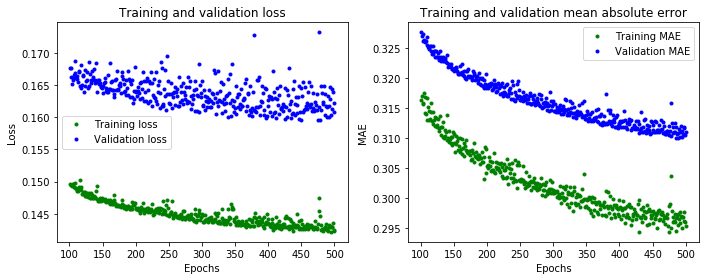

In [37]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()

In [38]:
## Here we update the network's structure: add one more dense layer
## and add more neurons for 1st layer

model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations
model.add(keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model.compile(optimizer='adam', loss="mse", metrics=["mae"])

In [39]:
# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=64,
                    validation_data=(x_validate, y_validate))

Epoch 1/500
19/19 [==============================] - 0s 6ms/step - loss: 1.3097 - mae: 0.9847 - val_loss: 0.7490 - val_mae: 0.7881
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6809 - mae: 0.7476 - val_loss: 0.5200 - val_mae: 0.6424
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5433 - mae: 0.6573 - val_loss: 0.4745 - val_mae: 0.5937
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4840 - mae: 0.6028 - val_loss: 0.4459 - val_mae: 0.5731
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4728 - mae: 0.5989 - val_loss: 0.4153 - val_mae: 0.5547
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4313 - mae: 0.5705 - val_loss: 0.3879 - val_mae: 0.5359
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3874 - mae: 0.5365 - val_loss: 0.3602 - val_mae: 0.5178
Epoch 8/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3599 - m

19/19 [==============================] - 0s 2ms/step - loss: 0.0694 - mae: 0.1843 - val_loss: 0.0847 - val_mae: 0.2076
Epoch 64/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0718 - mae: 0.1899 - val_loss: 0.0843 - val_mae: 0.2056
Epoch 65/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0699 - mae: 0.1841 - val_loss: 0.0838 - val_mae: 0.2045
Epoch 66/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0722 - mae: 0.1910 - val_loss: 0.0813 - val_mae: 0.2033
Epoch 67/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0687 - mae: 0.1869 - val_loss: 0.0802 - val_mae: 0.2025
Epoch 68/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0630 - mae: 0.1780 - val_loss: 0.0803 - val_mae: 0.2009
Epoch 69/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0658 - mae: 0.1859 - val_loss: 0.0773 - val_mae: 0.2004
Epoch 70/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0623 - mae: 0

Epoch 125/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0235 - mae: 0.1108 - val_loss: 0.0298 - val_mae: 0.1308
Epoch 126/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0256 - mae: 0.1190 - val_loss: 0.0305 - val_mae: 0.1307
Epoch 127/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0262 - mae: 0.1189 - val_loss: 0.0292 - val_mae: 0.1297
Epoch 128/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0241 - mae: 0.1159 - val_loss: 0.0280 - val_mae: 0.1274
Epoch 129/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0237 - mae: 0.1156 - val_loss: 0.0288 - val_mae: 0.1260
Epoch 130/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0238 - mae: 0.1169 - val_loss: 0.0278 - val_mae: 0.1254
Epoch 131/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0228 - mae: 0.1134 - val_loss: 0.0296 - val_mae: 0.1252
Epoch 132/500
19/19 [==============================] - 0s 2ms/step - 

19/19 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0914 - val_loss: 0.0135 - val_mae: 0.0938
Epoch 187/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0125 - mae: 0.0899 - val_loss: 0.0133 - val_mae: 0.0929
Epoch 188/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0121 - mae: 0.0875 - val_loss: 0.0136 - val_mae: 0.0935
Epoch 189/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0120 - mae: 0.0869 - val_loss: 0.0133 - val_mae: 0.0926
Epoch 190/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0120 - mae: 0.0881 - val_loss: 0.0131 - val_mae: 0.0932
Epoch 191/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0119 - mae: 0.0869 - val_loss: 0.0130 - val_mae: 0.0923
Epoch 192/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0816 - val_loss: 0.0128 - val_mae: 0.0919
Epoch 193/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0110 -

Epoch 248/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0826 - val_loss: 0.0117 - val_mae: 0.0864
Epoch 249/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0101 - mae: 0.0795 - val_loss: 0.0120 - val_mae: 0.0868
Epoch 250/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0105 - mae: 0.0817 - val_loss: 0.0119 - val_mae: 0.0866
Epoch 251/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0105 - mae: 0.0821 - val_loss: 0.0116 - val_mae: 0.0858
Epoch 252/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0818 - val_loss: 0.0116 - val_mae: 0.0860
Epoch 253/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0824 - val_loss: 0.0116 - val_mae: 0.0859
Epoch 254/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0100 - mae: 0.0798 - val_loss: 0.0119 - val_mae: 0.0889
Epoch 255/500
19/19 [==============================] - 0s 2ms/step - 

19/19 [==============================] - 0s 2ms/step - loss: 0.0117 - mae: 0.0865 - val_loss: 0.0116 - val_mae: 0.0857
Epoch 310/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0819 - val_loss: 0.0122 - val_mae: 0.0891
Epoch 311/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0105 - mae: 0.0816 - val_loss: 0.0114 - val_mae: 0.0852
Epoch 312/500
19/19 [==============================] - 0s 10ms/step - loss: 0.0107 - mae: 0.0825 - val_loss: 0.0117 - val_mae: 0.0862
Epoch 313/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0105 - mae: 0.0819 - val_loss: 0.0114 - val_mae: 0.0852
Epoch 314/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0828 - val_loss: 0.0121 - val_mae: 0.0875
Epoch 315/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0825 - val_loss: 0.0117 - val_mae: 0.0859
Epoch 316/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0107 

Epoch 371/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0819 - val_loss: 0.0115 - val_mae: 0.0866
Epoch 372/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0101 - mae: 0.0807 - val_loss: 0.0118 - val_mae: 0.0865
Epoch 373/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0813 - val_loss: 0.0114 - val_mae: 0.0861
Epoch 374/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0823 - val_loss: 0.0116 - val_mae: 0.0869
Epoch 375/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0108 - mae: 0.0825 - val_loss: 0.0130 - val_mae: 0.0921
Epoch 376/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0814 - val_loss: 0.0118 - val_mae: 0.0869
Epoch 377/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0106 - mae: 0.0818 - val_loss: 0.0118 - val_mae: 0.0881
Epoch 378/500
19/19 [==============================] - 0s 2ms/step - 

19/19 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0828 - val_loss: 0.0114 - val_mae: 0.0857
Epoch 433/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0116 - mae: 0.0858 - val_loss: 0.0116 - val_mae: 0.0866
Epoch 434/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0105 - mae: 0.0814 - val_loss: 0.0116 - val_mae: 0.0865
Epoch 435/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0111 - mae: 0.0833 - val_loss: 0.0115 - val_mae: 0.0867
Epoch 436/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0114 - mae: 0.0856 - val_loss: 0.0114 - val_mae: 0.0865
Epoch 437/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0109 - mae: 0.0827 - val_loss: 0.0114 - val_mae: 0.0853
Epoch 438/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0107 - mae: 0.0816 - val_loss: 0.0115 - val_mae: 0.0853
Epoch 439/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0108 -

Epoch 494/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0105 - mae: 0.0824 - val_loss: 0.0114 - val_mae: 0.0862
Epoch 495/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0823 - val_loss: 0.0130 - val_mae: 0.0918
Epoch 496/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0108 - mae: 0.0828 - val_loss: 0.0113 - val_mae: 0.0850
Epoch 497/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0103 - mae: 0.0811 - val_loss: 0.0114 - val_mae: 0.0865
Epoch 498/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0108 - mae: 0.0830 - val_loss: 0.0113 - val_mae: 0.0856
Epoch 499/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0104 - mae: 0.0818 - val_loss: 0.0114 - val_mae: 0.0853
Epoch 500/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0099 - mae: 0.0796 - val_loss: 0.0113 - val_mae: 0.0848


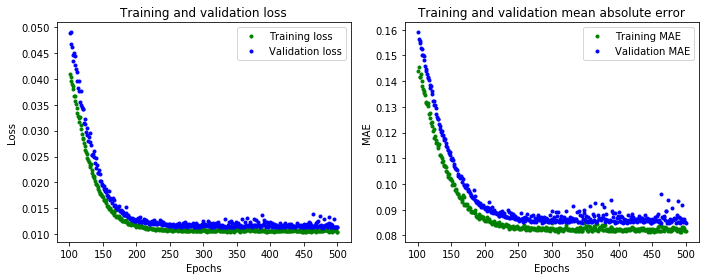

In [40]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()

13/13 [==============================] - 0s 506us/step - loss: 0.0097 - mae: 0.0769


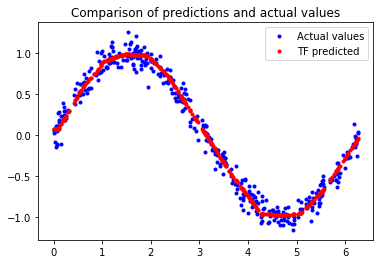

In [41]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predicted')
plt.legend()
plt.show()

## Generate a TensorFlow Lite Model 

##### important!!!